In [1]:
import numpy as np

In [2]:
from tracetools_analysis.ros_model import ApplicationFactory

In [3]:
trace_path = '~/.ros/tracing/v4l2_trace/ust'
# architecture_path = './architecture.json.template'
architecture_path = '../arch.json'

In [4]:
app = ApplicationFactory.create_from_json(architecture_path)

In [5]:
app.import_trace(trace_path, start_transition_ms=1000, end_transition_ms=1000)

converting trace directory: /home/zs/.ros/tracing/v4l2_trace/ust
converted 835 events in 42 ms
output written to: /home/zs/.ros/tracing/v4l2_trace/ust/converted
 [100%] [Ros2Handler]


In [6]:
list(app.comms)

In [7]:
print(app.comms[0].name)
print(app.comms[0].child[0].name)

/image_raw_0
/image_raw_dds_0


In [8]:
# node and comm
comm = app.comms[0]
dds = comm.child[0]

In [9]:
comm.name

'/image_raw_0'

In [10]:
dds.name

'/image_raw_dds_0'

In [11]:
import matplotlib.pyplot as plt

In [12]:
def label(path):
    return 'max: {} ms, {}'.format(path.max_ms, path.name)

In [13]:
comm.get_stats()

{'unit': 'ms',
 'min': 0.316928,
 'max': 0.33152,
 'median': 0.3232,
 'mean': 0.32341759999999997,
 'send': 20,
 'lost': 0}

In [14]:
dds.get_stats()

{'unit': 'ms',
 'min': 0.057344,
 'max': 0.072448,
 'median': 0.068352,
 'mean': 0.0674816,
 'send': 20,
 'lost': 0}

Text(0, 0.5, 'Probability')

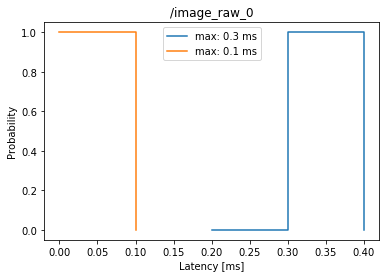

In [15]:
latency_ms, hist = comm.hist(binsize_ns=100000).get_xy()
max_ms = comm.get_stats()['max']
plt.step(latency_ms, hist, label='max: {:0.1f} ms'.format(max_ms), where='post')

latency_ms, hist = dds.hist(binsize_ns=100000).get_xy()
max_ms = dds.get_stats()['max']
plt.step(latency_ms, hist, label='max: {:0.1f} ms'.format(max_ms), where='post')

plt.legend()
plt.title(comm.name)
plt.xlabel('Latency [ms]')
plt.ylabel('Probability')

Text(0, 0.5, 'Latency [ms]')

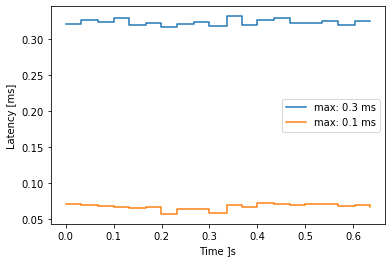

In [16]:
system_time_ns, latency_ns = comm.timeseries.get_xy()
time = (system_time_ns - system_time_ns[0]) * 1.0e-9
latency_ms = latency_ns * 1.0e-6
max_ms = comm.get_stats()['max']
plt.step(time, latency_ms, label='max: {:.1f} ms'.format(max_ms), where='post')

system_time_ns, latency_ns = dds.timeseries.get_xy()
time = (system_time_ns - system_time_ns[0]) * 1.0e-9
latency_ms = latency_ns * 1.0e-6
max_ms = dds.get_stats()['max']
plt.step(time, latency_ms, label='max: {:.1f} ms'.format(max_ms), where='post')

plt.legend()
plt.xlabel('Time ]s')
plt.ylabel('Latency [ms]')